# IMAGE SEGMENTATION USING K MEANS ALGORITHM.
## Importing neccessary libraires

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

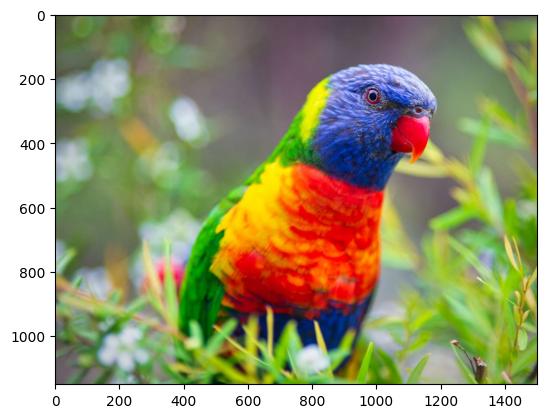

In [73]:

img = cv2.imread("sample.jpg", cv2.IMREAD_UNCHANGED)
plt.imshow(img)

#Changing it BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Finding out the shape of the above image.

In [74]:
print(img.shape)

(1150, 1500, 3)


## Flattening the image

In [75]:
# Reshaping the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = img.reshape((-1, 3))

# Convert to float
pixel_values = np.float32(pixel_values)

In [76]:
#Printing the shape
print(pixel_values.shape)

(1725000, 3)


## Stopping  criteria

In [78]:
# Define the stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

## Clustering

In [79]:
# Number of clusters (k)
k = 3
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [80]:
# Convert back to 8 bit values
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

## Final image Formation

In [81]:
# Convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

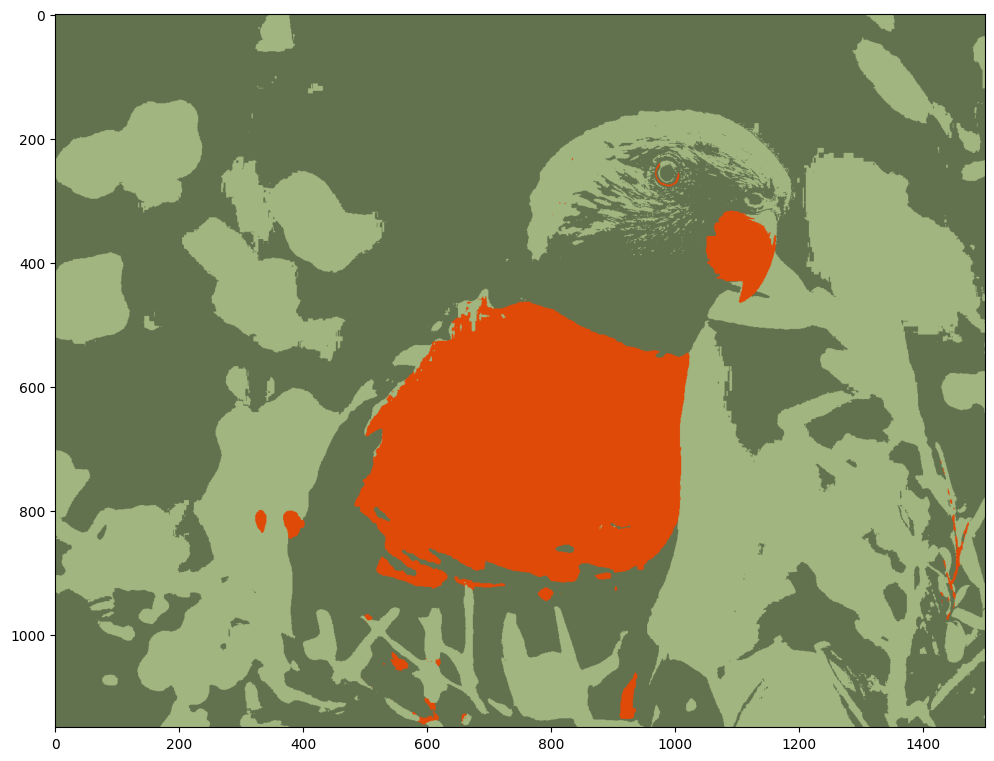

In [82]:
# Reshape back to the original image dimension
segmented_image = segmented_image.reshape(img.shape)

# Show the image
plt.figure(figsize=(12, 10))
plt.imshow(segmented_image)
plt.show()

## Analysis

In [84]:
# Disable the cluster number 0, 1 and 2 (turning the pixels into black)
masked_image0 = np.copy(img)
masked_image1 = np.copy(img)
masked_image2 = np.copy(img)

# Reshape labels to match the shape of the original image
labels = labels.reshape(img.shape[:2])

# Disabling Cluster 0
cluster = 0
masked_image0[labels == cluster] = [0, 0, 0]

# Disabling Cluster 1
cluster = 1
masked_image1[labels == cluster] = [0, 0, 0]

# Disabling Cluster 2
cluster = 2
masked_image2[labels == cluster] = [0, 0, 0]

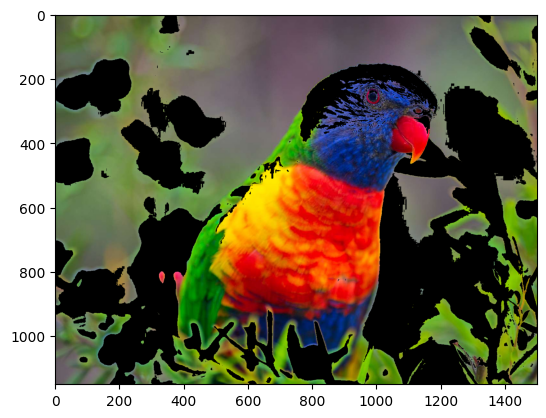

In [85]:
# Cluster 0 disabled
plt.imshow(masked_image0)
plt.show()

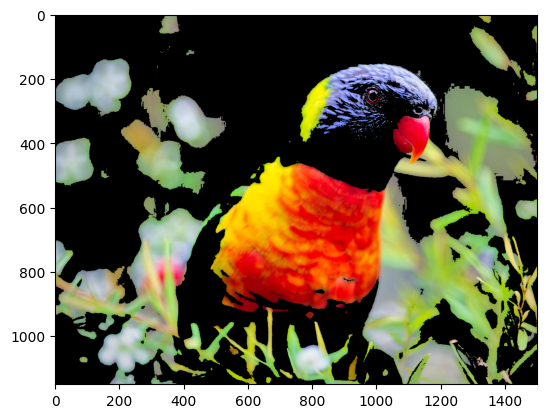

In [86]:
# Cluster 1 disabled
plt.imshow(masked_image1)
plt.show()

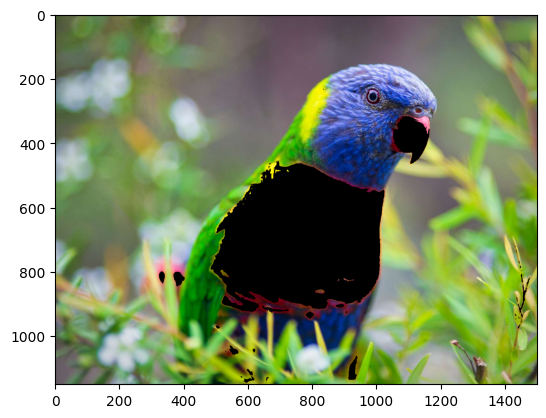

In [87]:
# Cluster 2 disabled
plt.imshow(masked_image2)
plt.show()